In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
import datetime
from datetime import timedelta, timezone
import sys
import pickle as pickle

In [2]:
codes = ['AAPL','AMZN','C','GOOG','JPM','NFLX','PLTR']

In [8]:
# Deserialize the data structures from a file in your Google Drive
with open('data_with_doc_vec', 'rb') as file:
    data = pickle.load(file)

with open('data_with_doc_vec_stock_data', 'rb') as file:
    stock_data = pickle.load(file)

In [10]:
#would be used in scenarios where you want to measure how unique or novel each entry in a series is compared to recent entries, as well as the frequency of similar entries in a recent time window.
#This could be applicable in fields like finance, social media analysis, or any domain where time and similarity metrics are important.

def calculate_novelty_volume(df, days):
    novelty = []
    volume = []
    for row in df.iterrows():
        try:
            start_time = row[1]['Created At'] - days
            temp = df[(df['Created At']>start_time) & (df['Created At']<row[1]['Created At'])]
            v = len(temp)
            n = np.nan
            if v != 0:
                x = row[1]['doc_vec'].reshape(-1,1)
                y = np.array(list(temp.doc_vec))
                n = 1 - max(np.dot(y,x).reshape(-1)/np.linalg.norm(x)/np.linalg.norm(y,axis=1))
            if v==0:
                v = np.nan
            novelty.append(n)
            volume.append(v)
        except:
            novelty.append(np.nan)
            volume.append(np.nan)
    return novelty, volume

In [11]:
### define time intervals
###  These intervals will be used to calculate novelty and volume metrics for the given periods.

days = [0.5, 1, 3, 5, 7]
for data in stock_data:
    if 'Novelty_0.5' in data.columns:
        continue;
    cre = 'Created At'
    if cre not in data.columns:
        cre = 'Created  At'
    data['Created At'] = pd.to_datetime(data[cre])
    ## Calculating Novelty and Volume:

    for day in tqdm(days):
        novelty, volume = calculate_novelty_volume(data, datetime.timedelta(days=day))
        # metric related to how "new" or "unusual" the stock's behavior is within the specified time period.
        #  trading volume or another volume-related metric for the stock within that time frame.
        # The results (novelty and volume) are then added to the DataFrame as new columns, named for the respective time interval (e.g., Novelty_0.5, Volume_0.5, etc.).
        data['Novelty_'+str(day)] = novelty
        data['Volume_' + str(day)] = volume

100%|████████████████████████████████████████████| 5/5 [53:23<00:00, 640.65s/it]


In [12]:
stock_data

[           User                                               Body  \
 0       2129386  $AAPL  🛑this is Barash heading into tomorrow. ...   
 1       6529169  $AAPL ... See y&#39;all @ $150.00!, cause of t...   
 2        128933  Apple $AAPL Rally Should Fail for More Downsid...   
 3        128933  $AAPL Ended the 3 waves bounce early last mont...   
 4        128933  Apple $AAPL 3 Waves Corrective Rally in Progre...   
 ...         ...                                                ...   
 252413  5286511  Unusual Option Alert on $AAPL $1,519,560 call ...   
 252414  2018701  $AAPL After seeing today&#39;s price action, I...   
 252415  2018701  $SPY $aapl $qqq Never bet on bears in bull mar...   
 252416   152351  For the die-hard option traders, a gr8 way to ...   
 252417  5831506                                    $SPY $IWM $AAPL   
 
                       Created At  Number of Likes Entities  length   Bearish  \
 0      2023-10-05 20:46:57+00:00                0  Bearish     3

In [13]:
data

Unnamed: 0     User  \
0                0  6835457   
1                1  5827747   
2                2  3918610   
3                3  3381181   
4                4  6300692   
...            ...      ...   
224587      224587  4484586   
224588      224588  1214135   
224589      224589  1050210   
224590      224590  6147980   
224591      224591  4600247   

                                                     Body  \
0                       $PLTR  this  is  bs  manipulation   
1                             $PLTR  ahahah  what  a  POS   
2       $PLTR  Now  what?  Tired  of  watching  this  ...   
3                          $PLTR  going  under  17  today   
4                            $PLTR  THIS  is  not  dovish   
...                                                   ...   
224587  $PLTR  \nThe  short  play  here  is  over,  th...   
224588  $PLTR  Terrible  investment.  Insiders  are  a...   
224589                          $PLTR  tax  loss  selling   
224590  $PLTR  picked  some  stock  up  after  hours\n...   
224591  $PLTR  people  who  got  in  early  on  Amazon...   

                 Created  At  Number  of  Likes Entities  length   Bearish  \
0       2023-10-19T16:36:44Z                  0      NaN      33 -1.607695   
1       2023-10-19T16:36:32Z                  0      NaN      27 -2.566195   
2       2023-10-19T16:35:51Z                  0      NaN      54 -0.543568   
3       2023-10-19T16:34:50Z                  0      NaN      30 -2.608138   
4       2023-10-19T16:30:46Z                  0      NaN      28 -2.632472   
...                      ...                ...      ...     ...       ...   
224587  2021-12-31T23:31:24Z                  4      NaN     344 -4.126100   
224588  2021-12-31T23:29:19Z                  2  Bearish     220  5.697704   
224589  2021-12-31T23:23:03Z                  3      NaN      25 -1.914202   
224590  2021-12-31T23:14:54Z                  2      NaN      73 -2.746489   
224591  2021-12-31T23:12:59Z                  6  Bullish     396  1.775299   

             Nay   Neutral  ...  Novelty_0.5  Volume_0.5 Novelty_1 Volume_1  \
0       8.208226 -0.181158  ...     0.005647       134.0  0.004150    265.0   
1      -2.538597  8.475845  ...     0.000586       133.0  0.000586    264.0   
2       7.125297  0.336588  ...     0.018069       132.0  0.018069    263.0   
3      -2.715280  8.394577  ...     0.000248       131.0  0.000183    262.0   
4      -2.539920  8.488290  ...     0.000292       130.0  0.000292    263.0   
...          ...       ...  ...          ...         ...       ...      ...   
224587 -1.415069 -2.233413  ...     1.121071         4.0  1.121071      4.0   
224588  2.047412 -3.512281  ...     0.674435         3.0  0.674435      3.0   
224589  8.049525  0.150170  ...     0.333154         2.0  0.333154      2.0   
224590 -2.433404  8.508695  ...     1.337166         1.0  1.337166      1.0   
224591  5.776383 -1.306329  ...          NaN         NaN       NaN      NaN   

        Novelty_3  Volume_3  Novelty_5  Volume_5  Novelty_7  Volume_7  
0        0.001160    1106.0   0.000306    1524.0   0.000306    2205.0  
1        0.000358    1105.0   0.000358    1523.0   0.000358    2205.0  
2        0.015219    1105.0   0.003014    1522.0   0.003014    2204.0  
3        0.000065    1104.0   0.000065    1521.0   0.000065    2205.0  
4        0.000162    1104.0   0.000156    1520.0   0.000156    2211.0  
...           ...       ...        ...       ...        ...       ...  
224587   1.121071       4.0   1.121071       4.0   1.121071       4.0  
224588   0.674435       3.0   0.674435       3.0   0.674435       3.0  
224589   0.333154       2.0   0.333154       2.0   0.333154       2.0  
224590   1.337166       1.0   1.337166       1.0   1.337166       1.0  
224591        NaN       NaN        NaN       NaN        NaN       NaN  

[211341 rows x 24 columns]

In [14]:
#file=open('stock_data_full_with_features', 'wb')
#pickle.dump(stock_data, file)
#file.close()

In [88]:
import pickle
file = open('stock_data_full_with_features','rb')
stock_data = pickle.load(file)
file.close()

In [4]:
temp = stock_data[0]

In [96]:
stock_data[0]

User                                               Body  \
0       2129386  $AAPL  🛑this is Barash heading into tomorrow. ...   
1       6529169  $AAPL ... See y&#39;all @ $150.00!, cause of t...   
2        128933  Apple $AAPL Rally Should Fail for More Downsid...   
3        128933  $AAPL Ended the 3 waves bounce early last mont...   
4        128933  Apple $AAPL 3 Waves Corrective Rally in Progre...   
...         ...                                                ...   
252413  5286511  Unusual Option Alert on $AAPL $1,519,560 call ...   
252414  2018701  $AAPL After seeing today&#39;s price action, I...   
252415  2018701  $SPY $aapl $qqq Never bet on bears in bull mar...   
252416   152351  For the die-hard option traders, a gr8 way to ...   
252417  5831506                                    $SPY $IWM $AAPL   

                      Created At  Number of Likes Entities  length   Bearish  \
0      2023-10-05 20:46:57+00:00                0  Bearish     309 -2.078926   
1      2023-10-05 20:40:12+00:00                0  Bearish      67  6.281903   
2      2023-10-05 20:39:04+00:00                0      NaN     130  6.019736   
3      2023-10-05 20:38:36+00:00                0      NaN     121 -1.752532   
4      2023-10-05 20:37:13+00:00                0      NaN     145 -4.412646   
...                          ...              ...      ...     ...       ...   
252413 2021-12-23 00:56:30+00:00                0      NaN     163 -0.204708   
252414 2021-12-23 00:50:49+00:00                6  Bullish     177 -2.630595   
252415 2021-12-23 00:48:54+00:00                2  Bullish     156 -0.801361   
252416 2021-12-23 00:48:51+00:00                0      NaN     338 -2.766372   
252417 2021-12-23 00:45:06+00:00                0      NaN      15 -2.515676   

             Nay   Neutral   Bullish  ...  Novelty_0.5 Volume_0.5  Novelty_1  \
0       0.121799 -1.379916  3.109067  ...     0.047611      221.0   0.047611   
1      -2.395925 -0.507155 -3.116224  ...     0.061671      220.0   0.046601   
2       1.652570 -2.170825 -1.775180  ...     0.074478      219.0   0.074478   
3       7.965793  0.083918 -1.036885  ...     0.004478      218.0   0.001801   
4      -1.474326 -0.253728  3.108950  ...     0.177542      217.0   0.177542   
...          ...       ...       ...  ...          ...        ...        ...   
252413  7.665049 -0.287979 -1.390510  ...     0.089248        4.0   0.089248   
252414 -2.080092  8.394600 -0.553677  ...     0.048749        3.0   0.048749   
252415  6.240356  1.422976 -1.410065  ...     1.037610        2.0   1.037610   
252416 -1.235392 -3.173552  0.396532  ...     1.278571        1.0   1.278571   
252417 -2.525370  8.500823 -1.032578  ...          NaN        NaN        NaN   

        Volume_1  Novelty_3  Volume_3  Novelty_5  Volume_5  Novelty_7  \
0          298.0   0.047611     905.0   0.032834    1248.0   0.032834   
1          301.0   0.003457     909.0   0.003457    1247.0   0.003457   
2          303.0   0.027052     908.0   0.000000    1246.0   0.000000   
3          302.0   0.001283     907.0   0.001283    1245.0   0.001283   
4          302.0   0.065740     906.0   0.065740    1244.0   0.065740   
...          ...        ...       ...        ...       ...        ...   
252413       4.0   0.089248       4.0   0.089248       4.0   0.089248   
252414       3.0   0.048749       3.0   0.048749       3.0   0.048749   
252415       2.0   1.037610       2.0   1.037610       2.0   1.037610   
252416       1.0   1.278571       1.0   1.278571       1.0   1.278571   
252417       NaN        NaN       NaN        NaN       NaN        NaN   

        Volume_7  
0         1657.0  
1         1663.0  
2         1662.0  
3         1661.0  
4         1660.0  
...          ...  
252413       4.0  
252414       3.0  
252415       2.0  
252416       1.0  
252417       NaN  

[244745 rows x 22 columns]

In [5]:
temp.columns

Index(['User', 'Body', 'Created At', 'Number of Likes', 'Entities', 'length',
       'Bearish', 'Nay', 'Neutral', 'Bullish', 'To the Moon!!', 'doc_vec',
       'Novelty_0.5', 'Volume_0.5', 'Novelty_1', 'Volume_1', 'Novelty_3',
       'Volume_3', 'Novelty_5', 'Volume_5', 'Novelty_7', 'Volume_7'],
      dtype='object')

In [51]:
import yfinance as yf

### for stocks under review
price_datas =[]
for code in codes:
    ticker_symbol = code
    ticker = yf.Ticker(ticker_symbol)
    price_datas.append(ticker.history(start="2022-1-1", end="2023-10-15"))

#  ^GSPC is typically the ticker symbol used to refer to the S&P 500 index on various financial data platforms like Yahoo Finance.
ticker_symbol = "^GSPC"
ticker = yf.Ticker(ticker_symbol)
market_data = ticker.history(start="2022-1-1", end="2023-10-15")

In [81]:
import pandas as pd

prices = []

# Assuming 'market_data' is defined outside this snippet and properly preprocessed.

for price_data in price_datas:
    # Assuming 'Date' is already the index, if not, set 'Date' as the index.
    price_data = price_data.reset_index()
    price_data['Date'] = price_data.reset_index()['Date'].dt.tz_convert('UTC')
    #price_data['Date'] = pd.to_datetime(price_data['Date']).dt.tz_localize(None).dt.tz_convert('UTC')
    price_data = price_data.set_index('Date')

    # Calculate 1-day returns for stock's close and open prices, and market data.
    stock_returns_close_1 = pd.DataFrame((price_data['Close'].iloc[1:].values / price_data['Close'].iloc[:-1].values - 1) * 100, 
                                         index=price_data.index[1:], columns=['returnsClosePrevRaw1'])
    stock_returns_open_1 = pd.DataFrame((price_data['Open'].iloc[1:].values / price_data['Open'].iloc[:-1].values - 1) * 100, 
                                         index=price_data.index[1:], columns=['returnsOpenPrevRaw1'])
    market_returns_close_1 = pd.DataFrame((market_data['Close'].iloc[1:].values / market_data['Close'].iloc[:-1].values - 1) * 100, 
                                          index=market_data.index[1:], columns=['returnsClosePrevMkt1'])
    market_returns_open_1 = pd.DataFrame((market_data['Open'].iloc[1:].values / market_data['Open'].iloc[:-1].values - 1) * 100, 
                                         index=market_data.index[1:], columns=['returnsOpenPrevMkt1'])

    # Calculate 10-day returns for stock's close and open prices, and market data.
    stock_returns_close_10 = pd.DataFrame((price_data['Close'].iloc[10:].values / price_data['Close'].iloc[:-10].values - 1) * 100, 
                                          index=price_data.index[10:], columns=['returnsClosePrevRaw10'])
    stock_returns_open_10 = pd.DataFrame((price_data['Open'].iloc[10:].values / price_data['Open'].iloc[:-10].values - 1) * 100, 
                                         index=price_data.index[10:], columns=['returnsOpenPrevRaw10'])
    market_returns_close_10 = pd.DataFrame((market_data['Close'].iloc[10:].values / market_data['Close'].iloc[:-10].values - 1) * 100, 
                                           index=market_data.index[10:], columns=['returnsClosePrevMkt10'])
    market_returns_open_10 = pd.DataFrame((market_data['Open'].iloc[10:].values / market_data['Open'].iloc[:-10].values - 1) * 100, 
                                          index=market_data.index[10:], columns=['returnsOpenPrevMkt10'])

    # Calculate the next 10-day returns for the open price.
    stock_returns_open_10_next = pd.DataFrame((price_data['Open'].iloc[11:].values / price_data['Open'].iloc[1:-10].values - 1) * 100, 
                                              index=price_data.index[:-11], columns=['returnsOpenNext10'])
    market_returns_open_10_next = pd.DataFrame((market_data['Open'].iloc[11:].values / market_data['Open'].iloc[1:-10].values - 1) * 100, 
                                               index=market_data.index[:-11], columns=['returnsOpenNextMkt10'])

    # Calculate the next day's return (overnight return).
    next_day_return = pd.DataFrame((price_data['Close'].iloc[1:].values / price_data['Open'].iloc[1:].values - 1) * 100, 
                                   index=price_data.index[:-1], columns=['nextDayReturn'])
    next_day_market_return = pd.DataFrame((market_data['Close'].iloc[1:].values / market_data['Open'].iloc[1:].values - 1) * 100, 
                                          index=market_data.index[:-1], columns=['nextDayMarketReturn'])

    # Concatenate all calculated returns along with the original price data.
    price = pd.concat([price_data, 
                       stock_returns_close_1, 
                       stock_returns_open_1, 
                       ## this will give the stock return
                       ## stock's daily closing price returns adjusted by the market's returns. 
                       stock_returns_close_1.sub(market_returns_close_1['returnsClosePrevMkt1'], axis=0), 
                       stock_returns_open_1.sub(market_returns_open_1['returnsOpenPrevMkt1'], axis=0),
                       stock_returns_close_10, 
                       stock_returns_open_10, 
                       stock_returns_close_10.sub(market_returns_close_10['returnsClosePrevMkt10'], axis=0), 
                       stock_returns_open_10.sub(market_returns_open_10['returnsOpenPrevMkt10'], axis=0),
                       stock_returns_open_10_next, 
                       stock_returns_open_10_next.sub(market_returns_open_10_next['returnsOpenNextMkt10'], axis=0), 
                       next_day_return, 
                       next_day_return.sub(next_day_market_return['nextDayMarketReturn'], axis=0)], 
                      axis=1)

    price.columns = list(price_data.columns) + ['returnsClosePrevRaw1', 'returnsOpenPrevRaw1', 'returnsClosePrevMktres1', 'returnsOpenPrevMktres1',
                     'returnsClosePrevRaw10', 'returnsOpenPrevRaw10', 'returnsClosePrevMktres10', 'returnsOpenPrevMktres10'
                     , 'returnsOpenNextMktres10','next_10_day_relative_return', 'next_day_return', 'next_day_relative_return']
    
    # Drop rows with any missing values.
    price = price.dropna()

    # Append the processed DataFrame to the 'prices' list.
    prices.append(price)

price = pd.concat(prices)
# final_data = pd.concat(prices)


In [82]:
price.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'returnsClosePrevRaw1', 'returnsOpenPrevRaw1',
       'returnsClosePrevMktres1', 'returnsOpenPrevMktres1',
       'returnsClosePrevRaw10', 'returnsOpenPrevRaw10',
       'returnsClosePrevMktres10', 'returnsOpenPrevMktres10',
       'returnsOpenNextMktres10', 'next_10_day_relative_return',
       'next_day_return', 'next_day_relative_return'],
      dtype='object')

In [80]:
prices = []
for price_data in price_datas:
    price_data = price_data.reset_index()
    price_data['Date'] = price_data.reset_index()['Date'].dt.tz_convert('UTC')
    stock_returns_close_1 = pd.DataFrame((price_data['Close'][1:].values/price_data['Close'][:-1].values-1)*100, index = price_data.Date[1:], columns = ['return'])
    stock_returns_open_1 = pd.DataFrame((price_data['Open'][1:].values/price_data['Open'][:-1].values-1)*100, index = price_data.Date[1:], columns = ['return'])
    market_returns_close_1 = pd.DataFrame((market_data['Close'][1:].values/market_data['Close'][:-1].values-1)*100, index = market_data.index[1:], columns = ['return'])
    market_returns_open_1 = pd.DataFrame((market_data['Open'][1:].values/market_data['Open'][:-1].values-1)*100, index = market_data.index[1:], columns = ['return'])

    stock_returns_close_10 = pd.DataFrame((price_data['Close'][10:].values/price_data['Close'][:-10].values-1)*100, index = price_data.Date[10:], columns = ['return'])
    stock_returns_open_10 = pd.DataFrame((price_data['Open'][10:].values/price_data['Open'][:-10].values-1)*100, index = price_data.Date[10:], columns = ['return'])
    market_returns_close_10 = pd.DataFrame((market_data['Close'][10:].values/market_data['Close'][:-10].values-1)*100, index = market_data.index[10:], columns = ['return'])
    market_returns_open_10 = pd.DataFrame((market_data['Open'][10:].values/market_data['Open'][:-10].values-1)*100, index = market_data.index[10:], columns = ['return'])

    stock_returns_open_10_next = pd.DataFrame((price_data['Open'][11:].values/price_data['Open'][1:-10].values-1)*100, index = price_data.Date[:-11], columns = ['return'])
    market_returns_open_10_next = pd.DataFrame((market_data['Open'][11:].values/market_data['Open'][1:-10].values-1)*100, index = market_data.index[:-11], columns = ['return'])
    next_day_return = pd.DataFrame((price_data['Close'][1:].values/price_data['Open'][1:].values-1)*100, index = price_data.Date[:-1], columns = ['return'])
    next_day_market_return = pd.DataFrame((market_data['Close'][1:].values/market_data['Open'][1:].values-1)*100, index = market_data.index[:-1], columns = ['return'])
    price_data = price_data.set_index('Date')

    price = pd.concat([price_data, stock_returns_close_1, stock_returns_open_1, stock_returns_close_1 - market_returns_close_1, stock_returns_open_1 - market_returns_open_1,
                      stock_returns_close_10, stock_returns_open_10, stock_returns_close_10 - market_returns_close_10, stock_returns_open_10 - market_returns_open_10,
                      stock_returns_open_10_next, stock_returns_open_10_next-market_returns_open_10_next, next_day_return, next_day_return-next_day_market_return]
                      , axis=1)
    price.columns = list(price_data.columns) + ['returnsClosePrevRaw1', 'returnsOpenPrevRaw1', 'returnsClosePrevMktres1', 'returnsOpenPrevMktres1',
                     'returnsClosePrevRaw10', 'returnsOpenPrevRaw10', 'returnsClosePrevMktres10', 'returnsOpenPrevMktres10'
                     , 'returnsOpenNextMktres10','next_10_day_relative_return', 'next_day_return', 'next_day_relative_return']
    price = price.dropna()
    price.head()
    prices.append(price)


In [83]:
for i, code in enumerate(codes):
    stock_data[i]['ticker'] = code
    prices[i]['ticker'] = code

In [89]:
data = pd.concat(stock_data)

In [90]:
price = pd.concat(prices)

In [91]:
price

Open        High         Low       Close  \
Date                                                                        
2022-01-18 05:00:00+00:00  169.572495  170.590858  167.496227  167.881821   
2022-01-19 05:00:00+00:00  168.079558  169.147359  164.065425  164.352142   
2022-01-20 05:00:00+00:00  165.093679  167.763175  162.325307  162.651581   
2022-01-21 05:00:00+00:00  162.562606  164.451033  160.466559  160.575317   
2022-01-24 05:00:00+00:00  158.212319  160.466561  152.952410  159.794235   
...                               ...         ...         ...         ...   
2023-09-22 04:00:00+00:00   14.230000   14.415000   14.030000   14.130000   
2023-09-25 04:00:00+00:00   14.000000   14.240000   13.820000   14.220000   
2023-09-26 04:00:00+00:00   13.950000   14.170000   13.880000   13.960000   
2023-09-27 04:00:00+00:00   14.200000   14.960000   14.160000   14.850000   
2023-09-28 04:00:00+00:00   15.140000   15.960000   14.825000   15.770000   

                              Volume  Dividends  Stock Splits  \
Date                                                            
2022-01-18 05:00:00+00:00   90956700        0.0           0.0   
2022-01-19 05:00:00+00:00   94815000        0.0           0.0   
2022-01-20 05:00:00+00:00   91420500        0.0           0.0   
2022-01-21 05:00:00+00:00  122848900        0.0           0.0   
2022-01-24 05:00:00+00:00  162294600        0.0           0.0   
...                              ...        ...           ...   
2023-09-22 04:00:00+00:00   47714500        0.0           0.0   
2023-09-25 04:00:00+00:00   39693900        0.0           0.0   
2023-09-26 04:00:00+00:00   37276200        0.0           0.0   
2023-09-27 04:00:00+00:00   62780600        0.0           0.0   
2023-09-28 04:00:00+00:00   66590800        0.0           0.0   

                           returnsClosePrevRaw1  returnsOpenPrevRaw1  \
Date                                                                   
2022-01-18 05:00:00+00:00             -1.889419             0.099209   
2022-01-19 05:00:00+00:00             -2.102478            -0.880412   
2022-01-20 05:00:00+00:00             -1.034706            -1.776467   
2022-01-21 05:00:00+00:00             -1.276510            -1.533114   
2022-01-24 05:00:00+00:00             -0.486427            -2.676069   
...                                         ...                  ...   
2023-09-22 04:00:00+00:00              0.928572            -0.767089   
2023-09-25 04:00:00+00:00              0.636944            -1.616300   
2023-09-26 04:00:00+00:00             -1.828412            -0.357144   
2023-09-27 04:00:00+00:00              6.375361             1.792115   
2023-09-28 04:00:00+00:00              6.195287             6.619722   

                           returnsClosePrevMktres1  returnsOpenPrevMktres1  \
Date                                                                         
2022-01-18 05:00:00+00:00                -0.050625                0.223185   
2022-01-19 05:00:00+00:00                -1.133524                0.073995   
2022-01-20 05:00:00+00:00                 0.069032               -0.889819   
2022-01-21 05:00:00+00:00                 0.614972                0.137534   
2022-01-24 05:00:00+00:00                -0.763601               -0.102812   
...                                            ...                     ...   
2023-09-22 04:00:00+00:00                 1.158132               -0.021389   
2023-09-25 04:00:00+00:00                 0.234637               -0.899534   
2023-09-26 04:00:00+00:00                -0.354959               -0.409567   
2023-09-27 04:00:00+00:00                 6.352429                2.493502   
2023-09-28 04:00:00+00:00                 5.605969                6.922806   

                           returnsClosePrevRaw10  returnsOpenPrevRaw10  \
Date                                                                     
2022-01-18 05:00:00+00:00              -6.708423             -3.553965   
2022-01-19 

In [94]:
print(data.columns)
data

Index(['User', 'Body', 'Created At', 'Number of Likes', 'Entities', 'length',
       'Bearish', 'Nay', 'Neutral', 'Bullish', 'To the Moon!!', 'doc_vec',
       'Novelty_0.5', 'Volume_0.5', 'Novelty_1', 'Volume_1', 'Novelty_3',
       'Volume_3', 'Novelty_5', 'Volume_5', 'Novelty_7', 'Volume_7',
       'Unnamed: 0', 'Created  At', 'Number  of  Likes'],
      dtype='object')


User                                               Body  \
0       2129386  $AAPL  🛑this is Barash heading into tomorrow. ...   
1       6529169  $AAPL ... See y&#39;all @ $150.00!, cause of t...   
2        128933  Apple $AAPL Rally Should Fail for More Downsid...   
3        128933  $AAPL Ended the 3 waves bounce early last mont...   
4        128933  Apple $AAPL 3 Waves Corrective Rally in Progre...   
...         ...                                                ...   
224587  4484586  $PLTR  \nThe  short  play  here  is  over,  th...   
224588  1214135  $PLTR  Terrible  investment.  Insiders  are  a...   
224589  1050210                          $PLTR  tax  loss  selling   
224590  6147980  $PLTR  picked  some  stock  up  after  hours\n...   
224591  4600247  $PLTR  people  who  got  in  early  on  Amazon...   

                      Created At  Number of Likes Entities  length   Bearish  \
0      2023-10-05 20:46:57+00:00              0.0  Bearish     309 -2.078926   
1      2023-10-05 20:40:12+00:00              0.0  Bearish      67  6.281903   
2      2023-10-05 20:39:04+00:00              0.0      NaN     130  6.019736   
3      2023-10-05 20:38:36+00:00              0.0      NaN     121 -1.752532   
4      2023-10-05 20:37:13+00:00              0.0      NaN     145 -4.412646   
...                          ...              ...      ...     ...       ...   
224587 2021-12-31 23:31:24+00:00              NaN      NaN     344 -4.126100   
224588 2021-12-31 23:29:19+00:00              NaN  Bearish     220  5.697704   
224589 2021-12-31 23:23:03+00:00              NaN      NaN      25 -1.914202   
224590 2021-12-31 23:14:54+00:00              NaN      NaN      73 -2.746489   
224591 2021-12-31 23:12:59+00:00              NaN  Bullish     396  1.775299   

             Nay   Neutral   Bullish  ...  Volume_1 Novelty_3  Volume_3  \
0       0.121799 -1.379916  3.109067  ...     298.0  0.047611     905.0   
1      -2.395925 -0.507155 -3.116224  ...     301.0  0.003457     909.0   
2       1.652570 -2.170825 -1.775180  ...     303.0  0.027052     908.0   
3       7.965793  0.083918 -1.036885  ...     302.0  0.001283     907.0   
4      -1.474326 -0.253728  3.108950  ...     302.0  0.065740     906.0   
...          ...       ...       ...  ...       ...       ...       ...   
224587 -1.415069 -2.233413  6.401759  ...       4.0  1.121071       4.0   
224588  2.047412 -3.512281 -1.720231  ...       3.0  0.674435       3.0   
224589  8.049525  0.150170 -1.073016  ...       2.0  0.333154       2.0   
224590 -2.433404  8.508695 -0.890457  ...       1.0  1.337166       1.0   
224591  5.776383 -1.306329 -0.980260  ...       NaN       NaN       NaN   

        Novelty_5  Volume_5  Novelty_7  Volume_7  Unnamed: 0  \
0        0.032834    1248.0   0.032834    1657.0         NaN   
1        0.003457    1247.0   0.003457    1663.0         NaN   
2        0.000000    1246.0   0.000000    1662.0         NaN   
3        0.001283    1245.0   0.001283    1661.0         NaN   
4        0.065740    1244.0   0.065740    1660.0         NaN   
...           ...       ...        ...       ...         ...   
224587   1.121071       4.0   1.121071       4.0    224587.0   
224588   0.674435       3.0   0.674435       3.0    224588.0   
224589   0.333154       2.0   0.333154       2.0    224589.0   
224590   1.337166       1.0   1.337166       1.0    224590.0   
224591        NaN       NaN        NaN       NaN    224591.0   

                 Created  At  Number  of  Likes  
0                        NaN                NaN  
1                        NaN                NaN  
2                        NaN                NaN  
3                        NaN                NaN  
4                        NaN                NaN  
...                      ...                ...  
224587  2021-12-31T23:31:24Z                4.0  
224588  2021-12-31T23:29:19Z                2.0  
224589  2021-12-31T23:23:03Z                3.0  
224590  2021-12-31T23:14:54Z           

Combining the data together

In [ ]:
#data.to_csv('data.csv')
#price.to_csv('price.csv')

#data = pd.read_csv('data.csv')
#price = pd.read_csv('price.csv')

In [12]:
print(data.iloc[0].Body)
np.exp(data.iloc[0].Bullish)

$AAPL  🛑this is Barash heading into tomorrow. Dow Jones how many consecutive trading days have been down? This is the beginning of the tornado in the stock market. We seen this  play over and over.    over the years. Apple hits all time highs in Plummet it wasn’t 198 not too long ago?  Reminds me around 2011


22.40013

Visualisation

In [14]:
import pandas as pd
import numpy as np
import time
#import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# plt.style.use('seaborn')
sns.set(font_scale=2)

import random
def generate_color():
    color = '#{:02x}{:02x}{:02x}'.format(*map(lambda x: random.randint(0, 255), range(3)))
    return color

import warnings
warnings.filterwarnings('ignore')
import os

In [18]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [97]:
news_train_df = data.copy()
market_train_df = price.copy()
# market_train_df = market_train_df.set_index('Date')
split = '2023-09-30 22:00:00+00:00'

market_test_df = market_train_df.loc[market_train_df.index > split]
news_test_df = news_train_df.loc[news_train_df['Created At'] > split]

market_train_df = market_train_df.loc[market_train_df.index <= split].reset_index(drop=False)
news_train_df = news_train_df.loc[news_train_df['Created At'] <= split].reset_index(drop=False)

In [98]:
market_train_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'returnsClosePrevRaw1', 'returnsOpenPrevRaw1',
       'returnsClosePrevMktres1', 'returnsOpenPrevMktres1',
       'returnsClosePrevRaw10', 'returnsOpenPrevRaw10',
       'returnsClosePrevMktres10', 'returnsOpenPrevMktres10',
       'returnsOpenNextMktres10', 'next_10_day_relative_return',
       'next_day_return', 'next_day_relative_return', 'ticker'],
      dtype='object')

In [101]:
news_train_df.columns

Index(['index', 'User', 'Body', 'Created At', 'Number of Likes', 'Entities',
       'length', 'Bearish', 'Nay', 'Neutral', 'Bullish', 'To the Moon!!',
       'doc_vec', 'Novelty_0.5', 'Volume_0.5', 'Novelty_1', 'Volume_1',
       'Novelty_3', 'Volume_3', 'Novelty_5', 'Volume_5', 'Novelty_7',
       'Volume_7', 'Unnamed: 0', 'Created  At', 'Number  of  Likes'],
      dtype='object')

Text(0.5, 1.0, 'market_train_df correlation matrix')

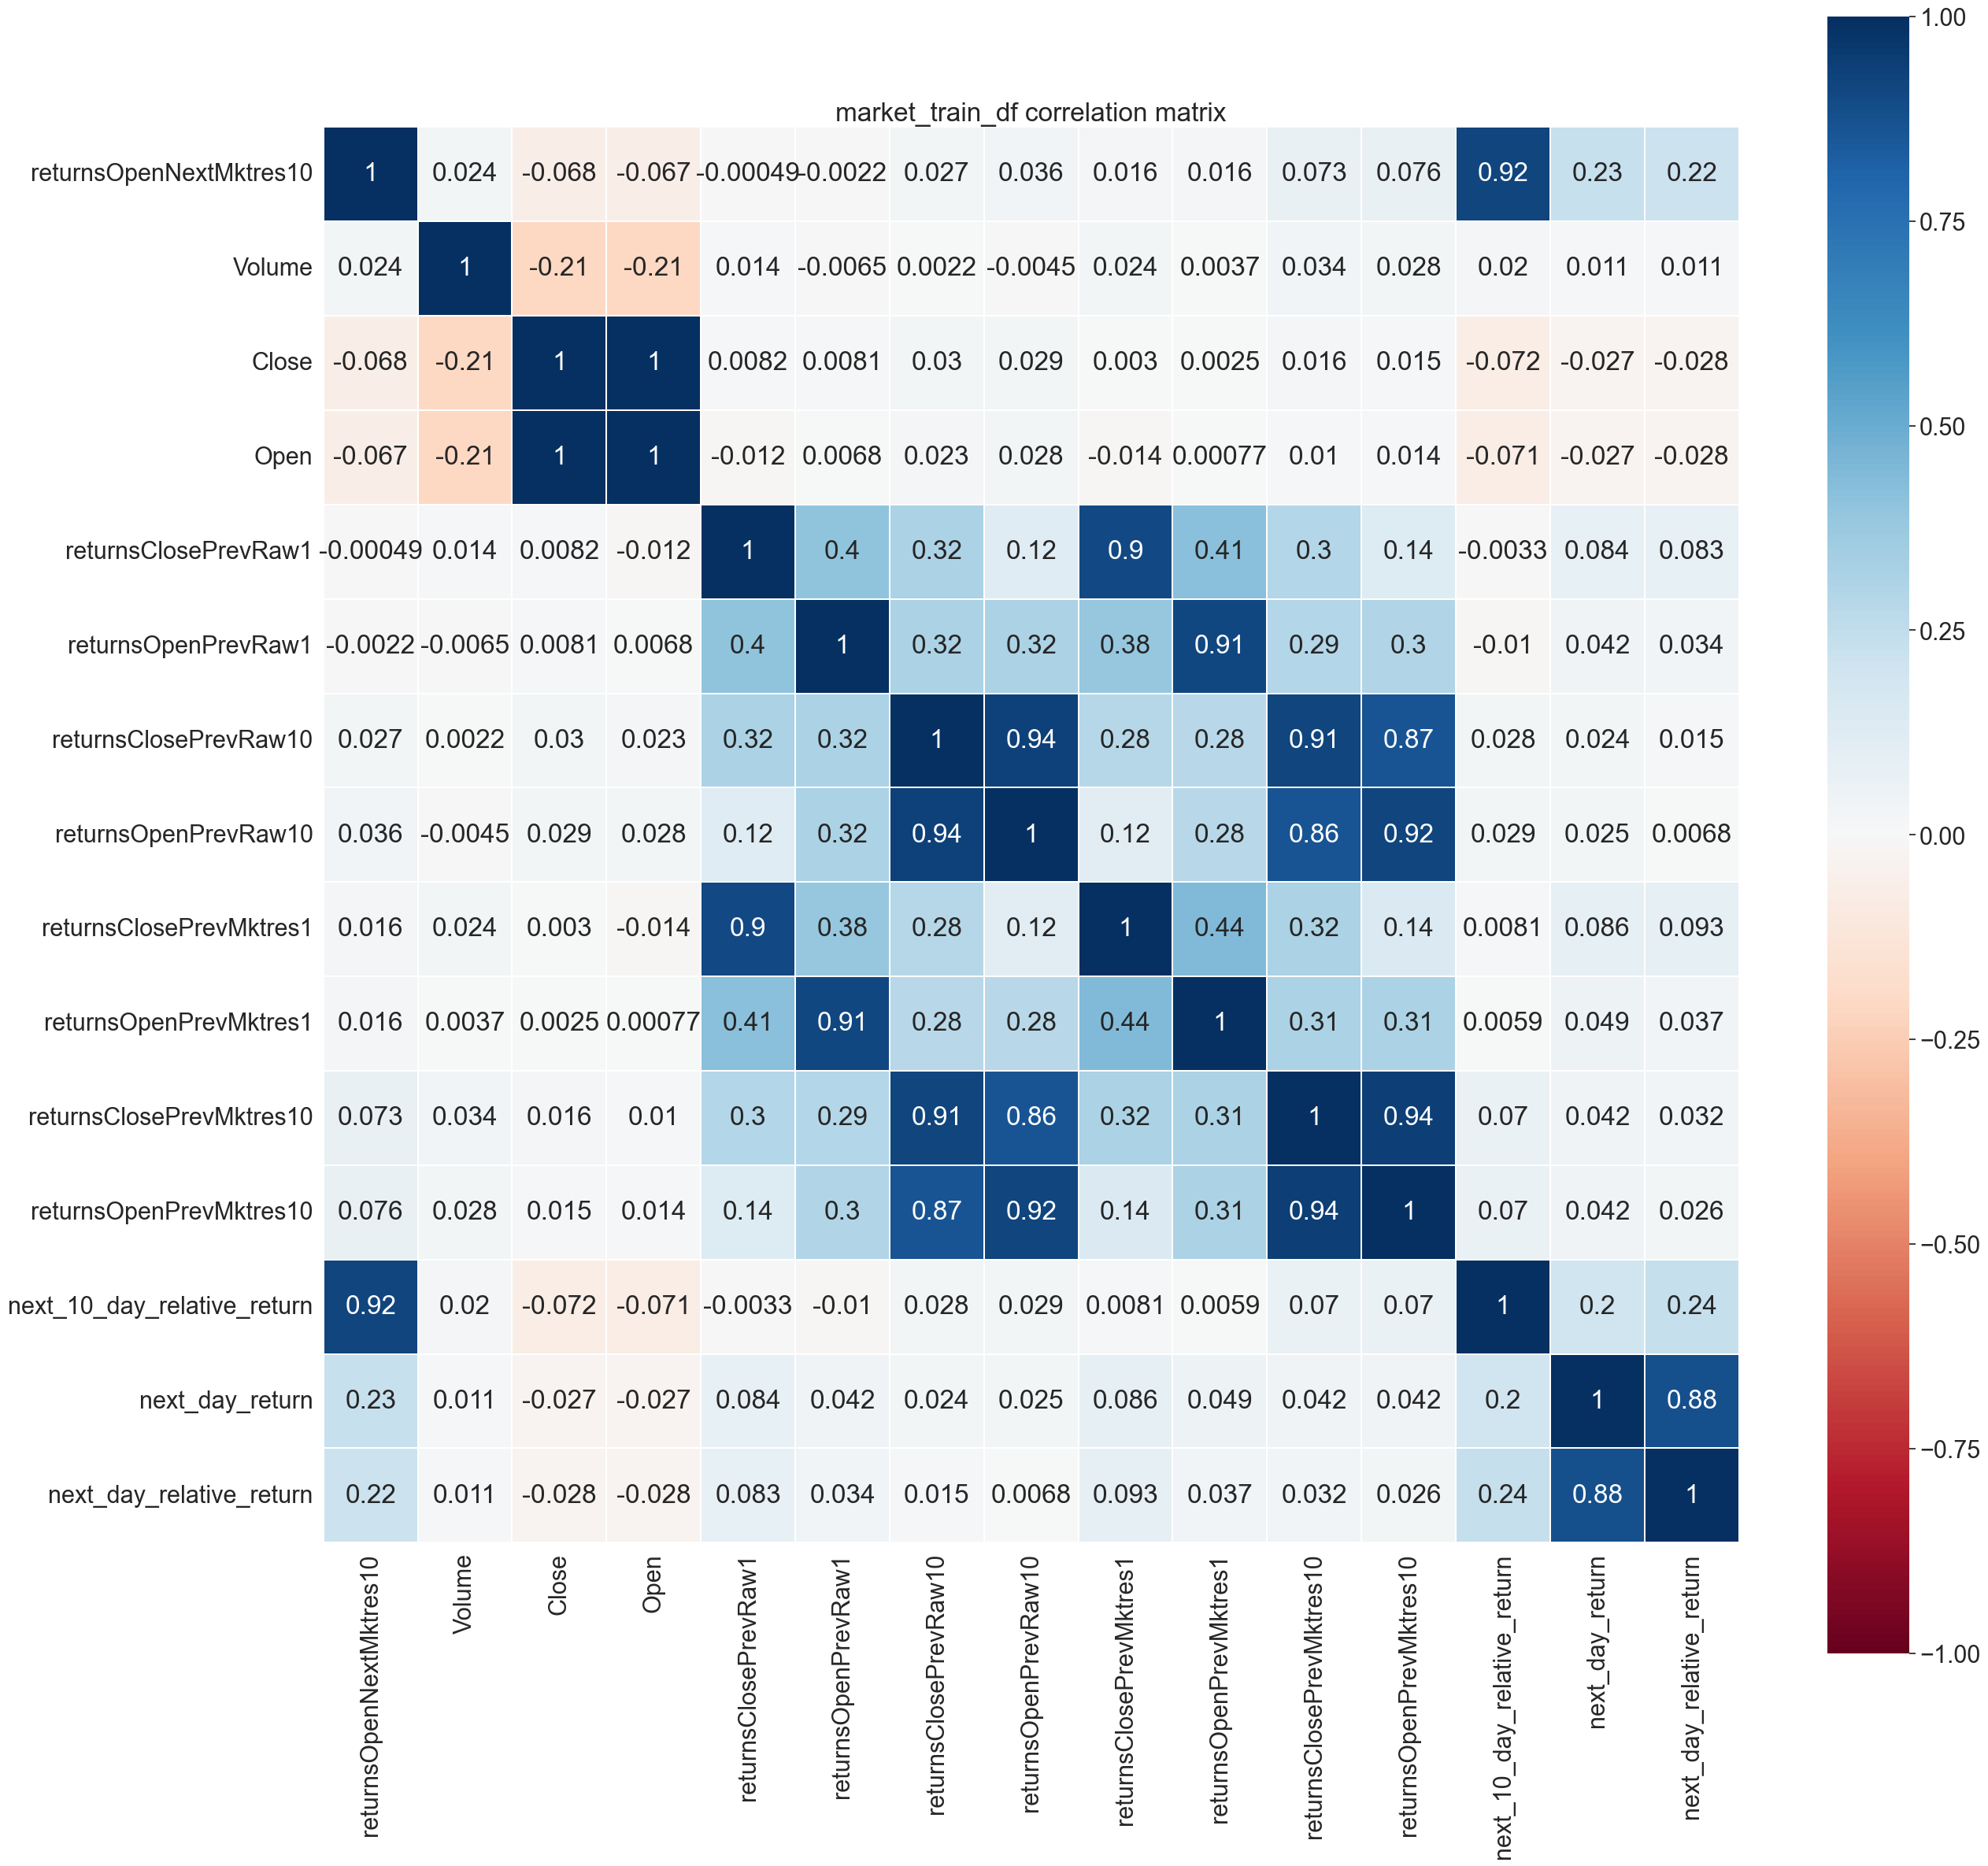

In [70]:
### for market data

columns_corr = ['returnsOpenNextMktres10', 'Volume', 'Close', 'Open', 'returnsClosePrevRaw1', 'returnsOpenPrevRaw1', 'returnsClosePrevRaw10', 'returnsOpenPrevRaw10',
           'returnsClosePrevMktres1', 'returnsOpenPrevMktres1', 'returnsClosePrevMktres10', 'returnsOpenPrevMktres10','next_10_day_relative_return', 'next_day_return', 'next_day_relative_return']
colormap = plt.cm.RdBu
plt.figure(figsize=(29,27))
sns.heatmap(market_train_df[columns_corr].astype(float).corr(), linewidths=0.1, vmax=1.0, vmin=-1., square=True, cmap=colormap, linecolor='white', annot=True)
plt.title('market_train_df correlation matrix')

In [102]:
news_train_df

index     User                                               Body  \
0          1285  1503190  $SPY $AAPL $DIS bears about to f around and fi...   
1          1286  4039810  $SPY $QQQ $AAPL $MSFT \n \n30-Sep WEEKLY RECAP...   
2          1287   588837  $AAPL   If they cancel student debt, they bett...   
3          1288  6018168  This will be one of the most important charts ...   
4          1289  6018168  $SPY know anyone who can do this?\nMany ticker...   
...         ...      ...                                                ...   
1060406  224587  4484586  $PLTR  \nThe  short  play  here  is  over,  th...   
1060407  224588  1214135  $PLTR  Terrible  investment.  Insiders  are  a...   
1060408  224589  1050210                          $PLTR  tax  loss  selling   
1060409  224590  6147980  $PLTR  picked  some  stock  up  after  hours\n...   
1060410  224591  4600247  $PLTR  people  who  got  in  early  on  Amazon...   

                       Created At  Number of Likes Entities  length   Bearish  \
0       2023-09-30 21:56:10+00:00              5.0  Bullish     199 -2.213572   
1       2023-09-30 21:45:04+00:00              0.0      NaN     130 -3.122374   
2       2023-09-30 21:37:13+00:00              2.0      NaN     314  5.415703   
3       2023-09-30 19:04:42+00:00              0.0      NaN     284 -3.977781   
4       2023-09-30 18:32:37+00:00              0.0      NaN     104 -2.613688   
...                           ...              ...      ...     ...       ...   
1060406 2021-12-31 23:31:24+00:00              NaN      NaN     344 -4.126100   
1060407 2021-12-31 23:29:19+00:00              NaN  Bearish     220  5.697704   
1060408 2021-12-31 23:23:03+00:00              NaN      NaN      25 -1.914202   
1060409 2021-12-31 23:14:54+00:00              NaN      NaN      73 -2.746489   
1060410 2021-12-31 23:12:59+00:00              NaN  Bullish     396  1.775299   

              Nay   Neutral  ...  Volume_1     Novelty_3 Volume_3  \
0       -1.517043  7.815648  ...      88.0  1.268327e-03    710.0   
1       -1.155491 -3.591854  ...      89.0 -1.192093e-07    711.0   
2        3.419421 -3.489376  ...      88.0  2.672982e-02    713.0   
3       -0.336003 -0.289894  ...     129.0 -1.192093e-07    767.0   
4       -2.215406  8.520893  ...     145.0  1.192093e-07    781.0   
...           ...       ...  ...       ...           ...      ...   
1060406 -1.415069 -2.233413  ...       4.0  1.121071e+00      4.0   
1060407  2.047412 -3.512281  ...       3.0  6.744354e-01      3.0   
1060408  8.049525  0.150170  ...       2.0  3.331535e-01      2.0   
1060409 -2.433404  8.508695  ...       1.0  1.337166e+00      1.0   
1060410  5.776383 -1.306329  ...       NaN           NaN      NaN   

            Novelty_5  Volume_5     Novelty_7  Volume_7  Unnamed: 0  \
0        1.268327e-03    1314.0  1.268327e-03    1626.0         NaN   
1       -1.192093e-07    1318.0 -1.192093e-07    1625.0         NaN   
2        2.672982e-02    1320.0  2.672982e-02    1624.0         NaN   
3       -1.192093e-07    1368.0 -1.192093e-07    1635.0         NaN   
4        1.192093e-07    1372.0  1.192093e-07    1641.0         NaN   
...               ...       ...           ...       ...         ...   
1060406  1.121071e+00       4.0  1.121071e+00       4.0    224587.0   
1060407  6.744354e-01       3.0  6.744354e-01       3.0    224588.0   
1060408  3.331535e-01       2.0  3.331535e-01       2.0    224589.0   
1060409  1.337166e+00       1.0  1.337166e+00       1.0    224590.0   
1060410           NaN       NaN           NaN       NaN    224591.0   

                  Created  At  Number  of  Likes  
0                         NaN                NaN  
1                         NaN                NaN  
2                         NaN                NaN  
3                         NaN                NaN  
4                         NaN                NaN  
...                       ...                ...  
1060406  2021-12-31T23:31:24Z                4.0 

In [103]:
news_train_df.columns

Index(['index', 'User', 'Body', 'Created At', 'Number of Likes', 'Entities',
       'length', 'Bearish', 'Nay', 'Neutral', 'Bullish', 'To the Moon!!',
       'doc_vec', 'Novelty_0.5', 'Volume_0.5', 'Novelty_1', 'Volume_1',
       'Novelty_3', 'Volume_3', 'Novelty_5', 'Volume_5', 'Novelty_7',
       'Volume_7', 'Unnamed: 0', 'Created  At', 'Number  of  Likes'],
      dtype='object')

Text(0.5, 1.0, 'news_train_df correlation matrix')

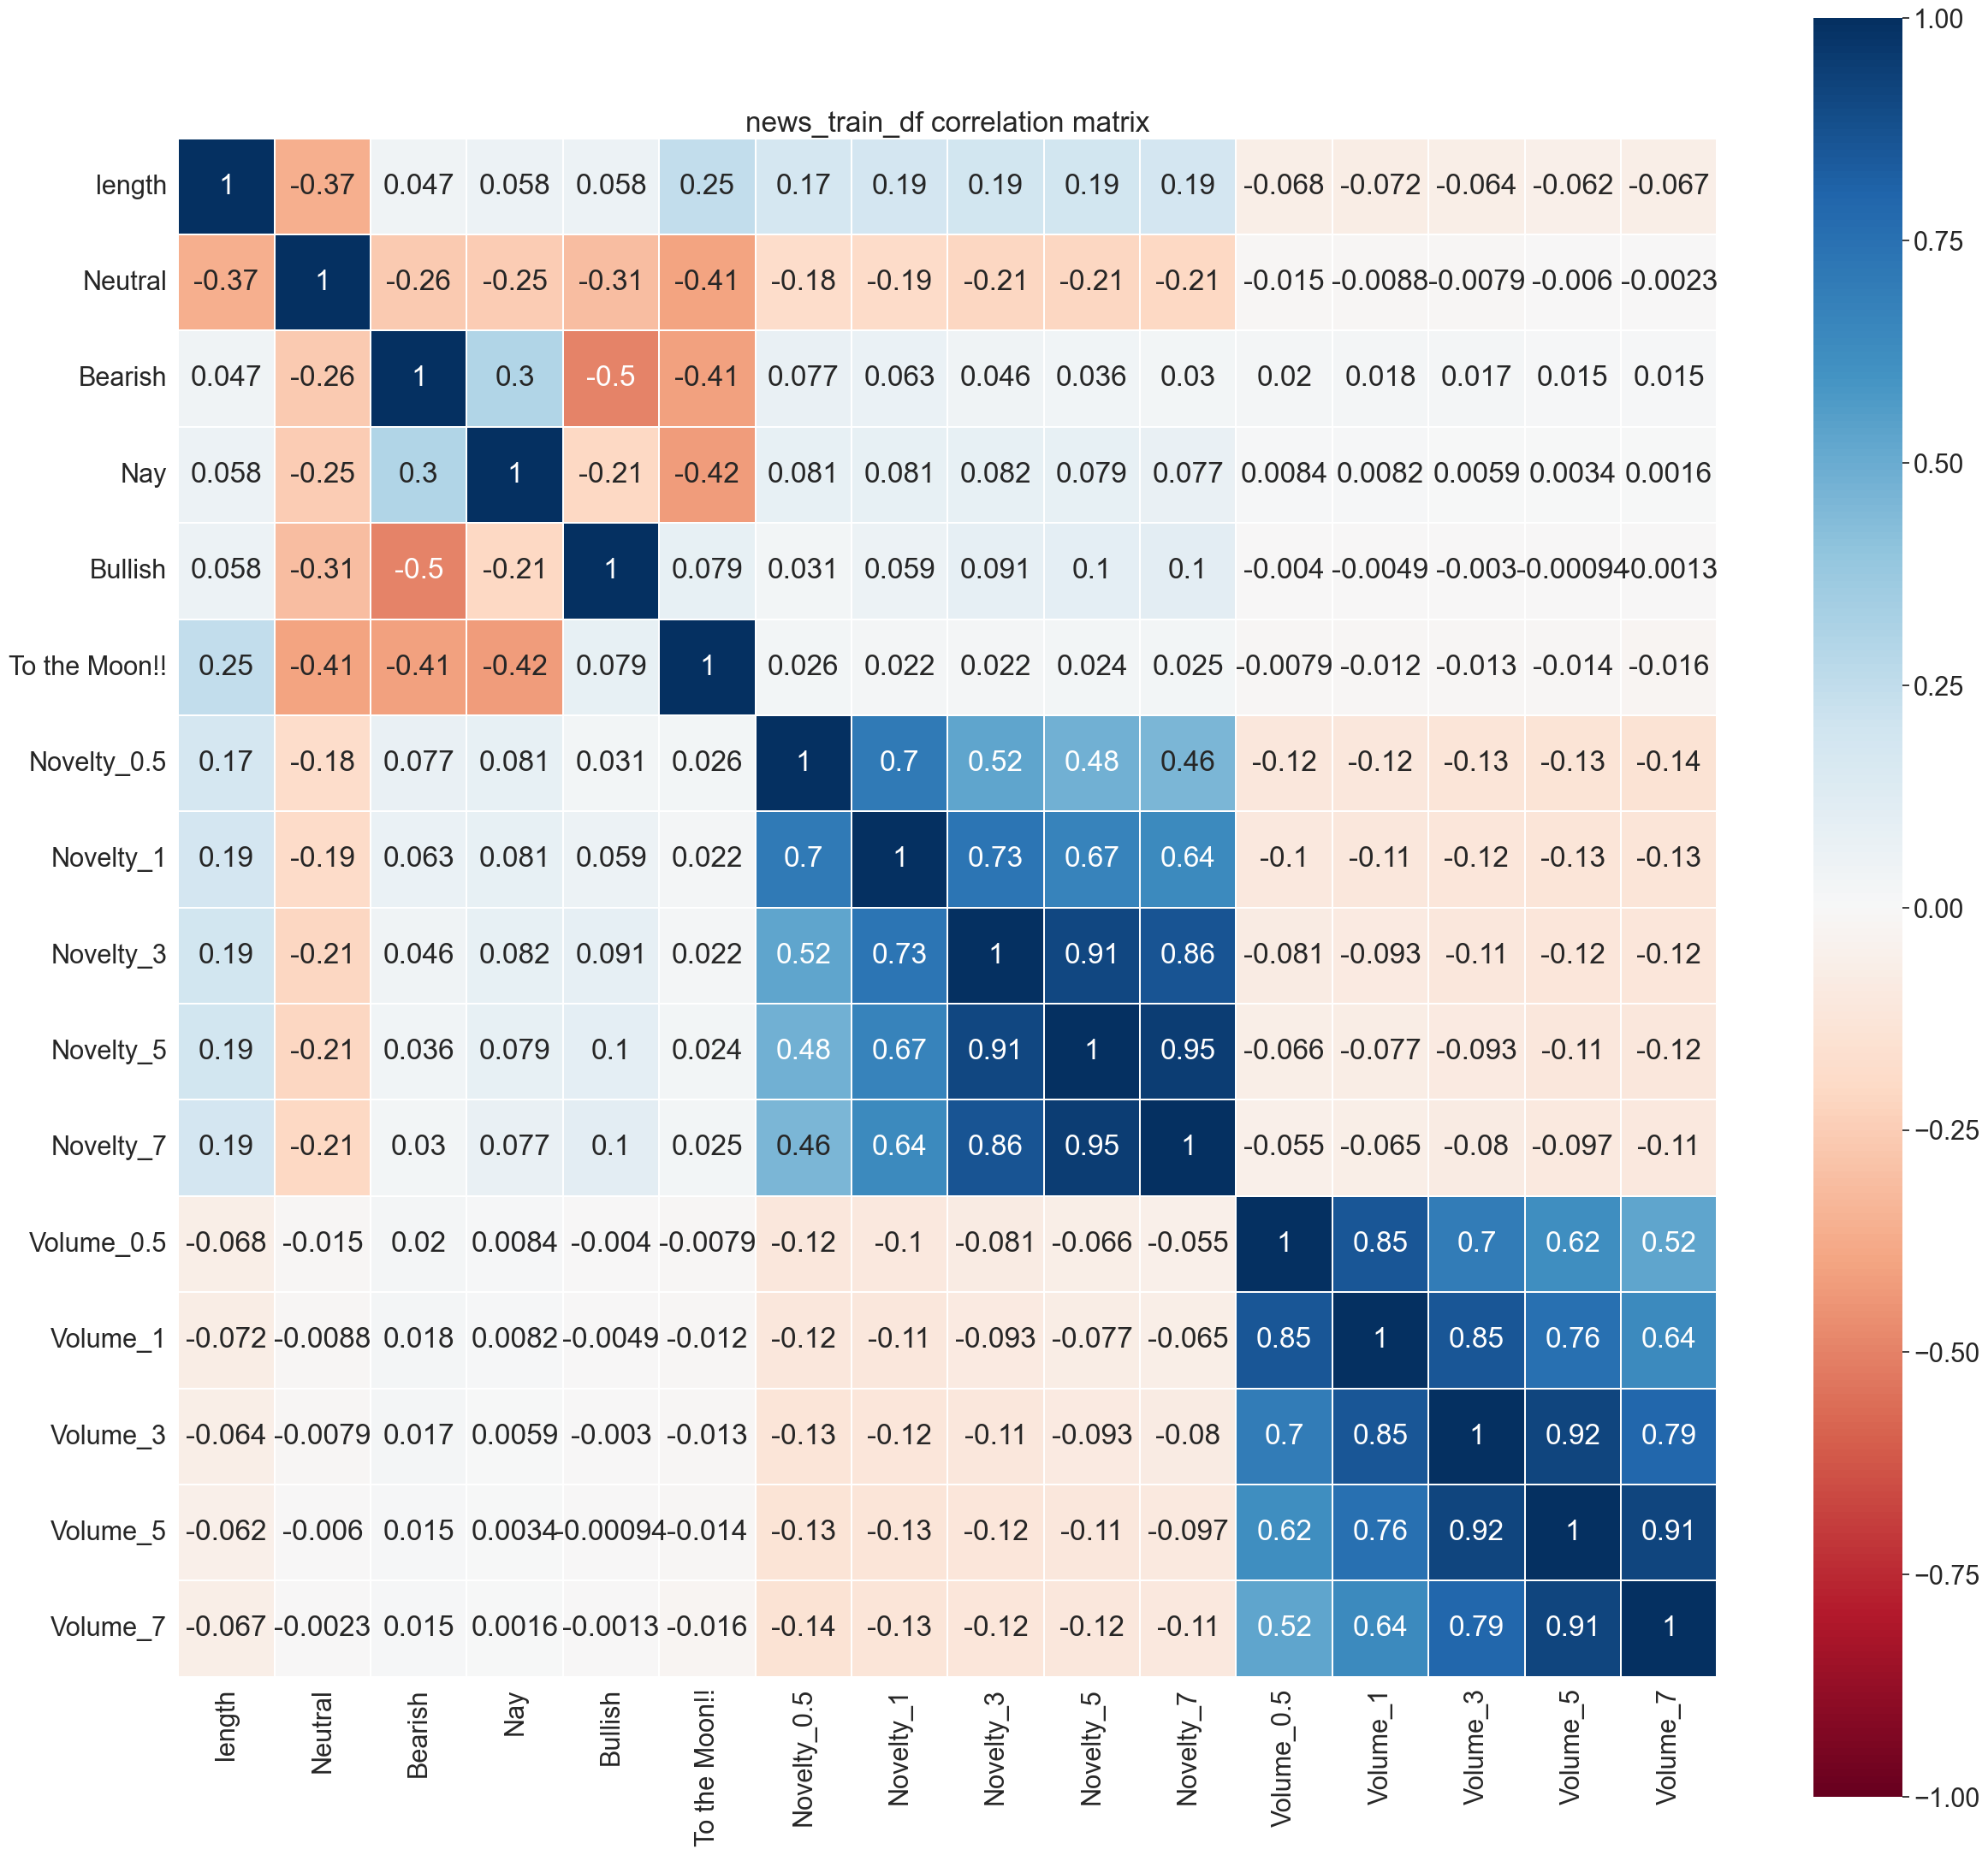

In [104]:
# Plot correlation
columns_corr = ['length', 'Neutral', 'Bearish', 'Nay', 'Bullish', 'To the Moon!!',
       'Novelty_0.5', 'Novelty_1', 'Novelty_3', 'Novelty_5', 'Novelty_7', 'Volume_0.5', 'Volume_1',
       'Volume_3', 'Volume_5', 'Volume_7']
colormap = plt.cm.RdBu
plt.figure(figsize=(29,27))
sns.heatmap(news_train_df[columns_corr].astype(float).corr(), linewidths=0.1, vmax=1.0, vmin=-1., square=True, cmap=colormap, linecolor='white', annot=True)
plt.title('news_train_df correlation matrix')

In [105]:
market_train_df['assetCode'] = market_train_df['ticker']
market_train_df.tail()

Date   Open    High     Low  Close    Volume  \
2984 2023-09-22 04:00:00+00:00  14.23  14.415  14.030  14.13  47714500   
2985 2023-09-25 04:00:00+00:00  14.00  14.240  13.820  14.22  39693900   
2986 2023-09-26 04:00:00+00:00  13.95  14.170  13.880  13.96  37276200   
2987 2023-09-27 04:00:00+00:00  14.20  14.960  14.160  14.85  62780600   
2988 2023-09-28 04:00:00+00:00  15.14  15.960  14.825  15.77  66590800   

      Dividends  Stock Splits  returnsClosePrevRaw1  returnsOpenPrevRaw1  ...  \
2984        0.0           0.0              0.928572            -0.767089  ...   
2985        0.0           0.0              0.636944            -1.616300  ...   
2986        0.0           0.0             -1.828412            -0.357144  ...   
2987        0.0           0.0              6.375361             1.792115  ...   
2988        0.0           0.0              6.195287             6.619722  ...   

      returnsClosePrevRaw10  returnsOpenPrevRaw10  returnsClosePrevMktres10  \
2984              -6.609385             -5.886246                 -3.526256   
2985              -9.943000             -9.149902                 -6.599906   
2986             -10.455421             -9.767142                 -6.233674   
2987              -4.807692             -9.149074                 -0.489108   
2988              -0.379024             -3.505413                  4.180251   

      returnsOpenPrevMktres10  returnsOpenNextMktres10  \
2984                -3.424952                16.071429   
2985                -5.348058                29.462364   
2986                -6.181619                25.845078   
2987                -5.115148                18.361953   
2988                 1.355117                12.104275   

      next_10_day_relative_return  next_day_return  next_day_relative_return  \
2984                    16.572519         1.571430                  0.949250   
2985                    28.839343         0.071686                  0.984072   
2986                    23.884601         4.577469                  4.767075   
2987                    15.755415         4.161163                  3.457352   
2988                    11.357771        -0.682809                  0.244379   

      ticker  assetCode  
2984    PLTR       PLTR  
2985    PLTR       PLTR  
2986    PLTR       PLTR  
2987    PLTR       PLTR  
2988    PLTR       PLTR  

[5 rows x 22 columns]

In [106]:
market_train_df['Date']=pd.to_datetime(market_train_df['Date'])
market_train_df = market_train_df.reset_index()
market_train_df['Date'] = market_train_df['Date'].dt.date

In [107]:
news_train_df['Created At'] = pd.to_datetime(news_train_df['Created At'])
news_train_df['Date'] = news_train_df['Created At'].dt.date

In [108]:
news_train_df = news_train_df.sort_values('Created At')
market_train_df = market_train_df.sort_values('Date')

In [109]:
from multiprocessing import Pool

def create_lag(df_code,n_lag=[3,7,14,],shift_size=1):
    code = df_code['assetCode'].unique()

    for col in tqdm(return_features):
        for window in n_lag:
            rolled = df_code[col].shift(shift_size).rolling(window=window)
            lag_mean = rolled.mean()
            lag_max = rolled.max()
            lag_min = rolled.min()
            lag_std = rolled.std()
            df_code['%s_lag_%s_mean'%(col,window)] = lag_mean
            df_code['%s_lag_%s_max'%(col,window)] = lag_max
            df_code['%s_lag_%s_min'%(col,window)] = lag_min
#             df_code['%s_lag_%s_std'%(col,window)] = lag_std
    return df_code.fillna(-1)

def generate_lag_features(df,n_lag = [3,7,14]):
    features = ['Date', 'assetCode','Volume', 'Close', 'Open',
       'returnsClosePrevRaw1', 'returnsOpenPrevRaw1',
       'returnsClosePrevMktres1', 'returnsOpenPrevMktres1',
       'returnsClosePrevRaw10', 'returnsOpenPrevRaw10',
       'returnsClosePrevMktres10', 'returnsOpenPrevMktres10',
       'returnsOpenNextMktres10']

    assetCodes = df['assetCode'].unique()
    print(assetCodes)
    all_df = []
    df_codes = df.groupby('assetCode')
    df_codes = [df_code[1][['Date','assetCode']+return_features] for df_code in df_codes]
    print('total %s df'%len(df_codes))

    # pool = Pool(4)
    # all_df = pool.map(create_lag, df_codes)
    all_df = [create_lag(x) for x in df_codes]

    new_df = pd.concat(all_df)
    new_df.drop(return_features,axis=1,inplace=True)
    # pool.close()

    return new_df

In [110]:
return_features = ['returnsClosePrevMktres10','returnsClosePrevRaw10','Open','Close']
n_lag = [3,7,14]
new_df = generate_lag_features(market_train_df,n_lag=n_lag)
market_train_df = pd.merge(market_train_df,new_df,how='left',on=['Date','assetCode'])

['AAPL' 'PLTR' 'C' 'NFLX' 'AMZN' 'GOOG' 'JPM']
total 7 df


100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 196.75it/s]


In [111]:
agg_dict = {'length':'mean', 'Neutral':'sum', 'Bullish':'sum',
       'To the Moon!!':'sum', 'Nay':'sum', 'Bearish': 'sum', 'Novelty_0.5':'mean', 'Volume_0.5':'max', 'Novelty_1':'mean',
       'Volume_1':'max', 'Novelty_3':'mean', 'Volume_3':'max', 'Novelty_5':'mean', 'Volume_5':'max',
       'Novelty_7':'mean', 'Volume_7':'max'}

In [112]:
news_result = news_train_df.groupby('Date').agg(agg_dict)
market_train_df = market_train_df.set_index('Date')

In [113]:
data = market_train_df.merge(news_result, left_index=True, right_index=True, how='outer').dropna()

In [114]:
list(data.columns)

['index',
 'Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'Dividends',
 'Stock Splits',
 'returnsClosePrevRaw1',
 'returnsOpenPrevRaw1',
 'returnsClosePrevMktres1',
 'returnsOpenPrevMktres1',
 'returnsClosePrevRaw10',
 'returnsOpenPrevRaw10',
 'returnsClosePrevMktres10',
 'returnsOpenPrevMktres10',
 'returnsOpenNextMktres10',
 'next_10_day_relative_return',
 'next_day_return',
 'next_day_relative_return',
 'ticker',
 'assetCode',
 'returnsClosePrevMktres10_lag_3_mean',
 'returnsClosePrevMktres10_lag_3_max',
 'returnsClosePrevMktres10_lag_3_min',
 'returnsClosePrevMktres10_lag_7_mean',
 'returnsClosePrevMktres10_lag_7_max',
 'returnsClosePrevMktres10_lag_7_min',
 'returnsClosePrevMktres10_lag_14_mean',
 'returnsClosePrevMktres10_lag_14_max',
 'returnsClosePrevMktres10_lag_14_min',
 'returnsClosePrevRaw10_lag_3_mean',
 'returnsClosePrevRaw10_lag_3_max',
 'returnsClosePrevRaw10_lag_3_min',
 'returnsClosePrevRaw10_lag_7_mean',
 'returnsClosePrevRaw10_lag_7_max',
 'returnsClosePrevRaw10_lag

In [117]:
columns_corr = ['index',
 'Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'Dividends',
 'Stock Splits',
 'returnsClosePrevRaw1',
 'returnsOpenPrevRaw1',
 'returnsClosePrevMktres1',
 'returnsOpenPrevMktres1',
 'returnsClosePrevRaw10',
 'returnsOpenPrevRaw10',
 'returnsClosePrevMktres10',
 'returnsOpenPrevMktres10',
 'returnsOpenNextMktres10',
 'next_10_day_relative_return',
 'next_day_return',
 'next_day_relative_return',
 #'ticker',
 #'assetCode',
 #'returnsClosePrevMktres10_lag_3_mean',
 #'returnsClosePrevMktres10_lag_3_max',
 #'returnsClosePrevMktres10_lag_3_min',
 #'returnsClosePrevMktres10_lag_7_mean',
 #'returnsClosePrevMktres10_lag_7_max',
 #'returnsClosePrevMktres10_lag_7_min',
 #'returnsClosePrevMktres10_lag_14_mean',
 #'returnsClosePrevMktres10_lag_14_max',
 #'returnsClosePrevMktres10_lag_14_min',
 #'returnsClosePrevRaw10_lag_3_mean',
 #'returnsClosePrevRaw10_lag_3_max',
 #'returnsClosePrevRaw10_lag_3_min',
 #'returnsClosePrevRaw10_lag_7_mean',
 #'returnsClosePrevRaw10_lag_7_max',
 #'returnsClosePrevRaw10_lag_7_min',
 #'returnsClosePrevRaw10_lag_14_mean',
 #'returnsClosePrevRaw10_lag_14_max',
 #'returnsClosePrevRaw10_lag_14_min',
 #'Open_lag_3_mean',
 #'Open_lag_3_max',
 #'Open_lag_3_min',
 #'Open_lag_7_mean',
 #'Open_lag_7_max',
 #'Open_lag_7_min',
 #'Open_lag_14_mean',
 #'Open_lag_14_max',
 #'Open_lag_14_min',
 #'Close_lag_3_mean',
 #'Close_lag_3_max',
 #'Close_lag_3_min',
 #'Close_lag_7_mean',
 #'Close_lag_7_max',
 #'Close_lag_7_min',
 #'Close_lag_14_mean',
 #'Close_lag_14_max',
 #'Close_lag_14_min',
 'length',
 'Neutral',
 'Bullish',
 'To the Moon!!',
 'Nay',
 'Bearish',
 'Novelty_0.5',
 'Volume_0.5',
 'Novelty_1',
 'Volume_1',
 'Novelty_3',
 'Volume_3',
 'Novelty_5',
 'Volume_5',
 'Novelty_7',
 'Volume_7']

    
colormap = plt.cm.RdBu
plt.figure(figsize=(100,100))
sns.heatmap(data[columns_corr].astype(float).corr(), linewidths=0.1, vmax=1.0, vmin=-1., square=True, cmap=colormap, linecolor='white', annot=True)
plt.title('news_train_df correlation matrix')
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')

In [118]:
columns_corr = ['index',
 'Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'Dividends',
 'Stock Splits',
 
## Without lag                
#'returnsClosePrevRaw1',
 #'returnsOpenPrevRaw1',
 #'returnsClosePrevMktres1',
 #'returnsOpenPrevMktres1',
 #'returnsClosePrevRaw10',
 #'returnsOpenPrevRaw10',
 #'returnsClosePrevMktres10',
 #'returnsOpenPrevMktres10',
 #'returnsOpenNextMktres10',
 #'next_10_day_relative_return',
 #'next_day_return',
 #'next_day_relative_return',
 #'ticker',
 #'assetCode',
## With lag
 'returnsClosePrevMktres10_lag_3_mean',
 'returnsClosePrevMktres10_lag_3_max',
 'returnsClosePrevMktres10_lag_3_min',
 'returnsClosePrevMktres10_lag_7_mean',
 'returnsClosePrevMktres10_lag_7_max',
 'returnsClosePrevMktres10_lag_7_min',
 'returnsClosePrevMktres10_lag_14_mean',
 'returnsClosePrevMktres10_lag_14_max',
 'returnsClosePrevMktres10_lag_14_min',
 'returnsClosePrevRaw10_lag_3_mean',
 'returnsClosePrevRaw10_lag_3_max',
 'returnsClosePrevRaw10_lag_3_min',
 'returnsClosePrevRaw10_lag_7_mean',
 'returnsClosePrevRaw10_lag_7_max',
 'returnsClosePrevRaw10_lag_7_min',
 'returnsClosePrevRaw10_lag_14_mean',
 'returnsClosePrevRaw10_lag_14_max',
 'returnsClosePrevRaw10_lag_14_min',
 #'Open_lag_3_mean',
 #'Open_lag_3_max',
 #'Open_lag_3_min',
 #'Open_lag_7_mean',
 #'Open_lag_7_max',
 #'Open_lag_7_min',
 #'Open_lag_14_mean',
 #'Open_lag_14_max',
 #'Open_lag_14_min',
 #'Close_lag_3_mean',
 #'Close_lag_3_max',
 #'Close_lag_3_min',
 #'Close_lag_7_mean',
 #'Close_lag_7_max',
 #'Close_lag_7_min',
 #'Close_lag_14_mean',
 #'Close_lag_14_max',
 #'Close_lag_14_min',
 'length',
 'Neutral',
 'Bullish',
 'To the Moon!!',
 'Nay',
 'Bearish',
 'Novelty_0.5',
 'Volume_0.5',
 'Novelty_1',
 'Volume_1',
 'Novelty_3',
 'Volume_3',
 'Novelty_5',
 'Volume_5',
 'Novelty_7',
 'Volume_7']

    
colormap = plt.cm.RdBu
plt.figure(figsize=(100,100))
sns.heatmap(data[columns_corr].astype(float).corr(), linewidths=0.1, vmax=1.0, vmin=-1., square=True, cmap=colormap, linecolor='white', annot=True)
plt.title('news_train_df correlation matrix')
plt.savefig('correlation_matrix_lag_features.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>